In [71]:
import pickle
pathd = "/Users/davidmoore/Downloads/e2eSensorNetwork-master/motion/"

In [72]:
with open(pathd+"anal", "rb") as f:
    dump = pickle.load(f)

In [73]:
import pandas as pd

In [74]:
df = pd.DataFrame.from_records(dump)

In [75]:
df['count'] = 1
df['DurMins'].unique()

array([1, 2, 3, 4, 5])

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Camera      243 non-null    object        
 1   StartEvent  243 non-null    datetime64[ns]
 2   EndEvent    243 non-null    datetime64[ns]
 3   FileName    243 non-null    object        
 4   DurMins     243 non-null    int64         
 5   count       243 non-null    int64         
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 11.5+ KB


In [77]:
df['hr'] = df['StartEvent'].apply(lambda x: x.hour)
df['day'] = df['StartEvent'].apply(lambda x: x.day)

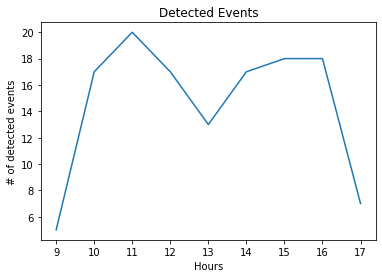

In [95]:
import matplotlib.pyplot as plt 
df[df['day']==8].groupby(['hr']).count()['DurMins'].plot(title='Detected Events')
plt.xlabel('Hours')
plt.ylabel('# of detected events')
plt.show()

